# COMP 4331 Introduction to Data Mining
## Assignment 1 

Q1. Implement the following procedure on the Iris dataset (https://github.com/jiaxinxie97/COMP4331/
tree/master/assign1/Q1). The dataset has 4 input features, and the output label is the type of flower. 

1. Show the boxplot for each feature. If a sample has an outlying feature, remove that sample.
    1. Save the processed dataset to Q1 1.csv, using the same format as the given cvs file.
    2. Include the boxplots of the original and processed datasets into the report.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
X = pd.read_csv('Q1/Q1_train.csv')
display(X.shape)
X.head()

(150, 5)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


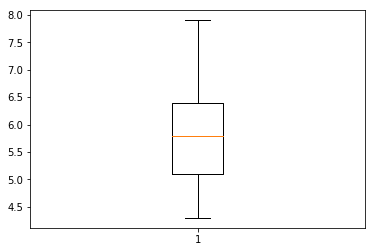

In [3]:
d1 = plt.boxplot(X['sepal length'])
plt.savefig('Q1/sepal_length_dist.png')

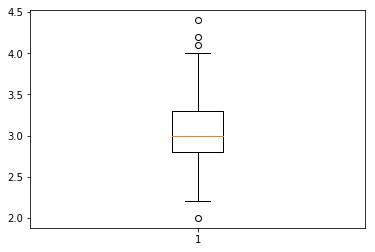

In [4]:
d2 = plt.boxplot(X['sepal width'])
plt.savefig('Q1/sepal_width_dist.png')

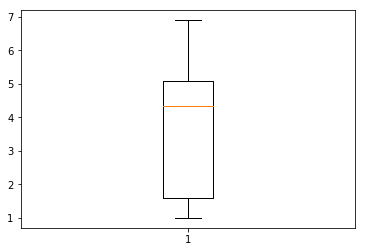

In [5]:
d3 = plt.boxplot(X['petal length'])
plt.savefig('Q1/petal_length_dist.png')

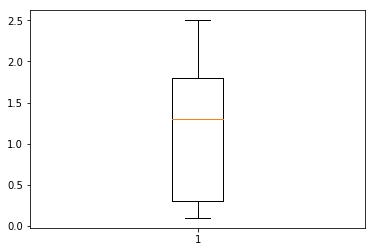

In [6]:
d4 = plt.boxplot(X['petal width'])
plt.savefig('Q1/petal_width_dist.png')

In [7]:
q1 = X['sepal width'].quantile(0.25)
q3 = X['sepal width'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
X = X.loc[(X['sepal width'] > fence_low) & (X['sepal width'] < fence_high)]
X.shape

(146, 5)

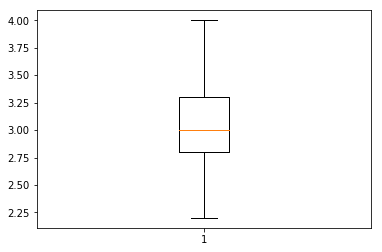

In [8]:
k2 = plt.boxplot(X['sepal width'])
plt.savefig('sepal_width_dist_updated.png')

In [9]:
q1 = X['sepal length'].quantile(0.25)
q3 = X['sepal length'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
X = X.loc[(X['sepal length'] > fence_low) & (X['sepal length'] < fence_high)]
X.shape

(146, 5)

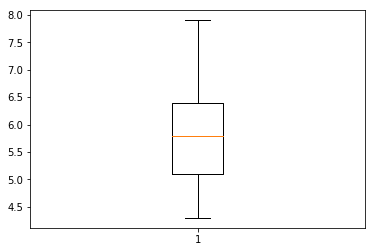

In [10]:
k1 = plt.boxplot(X['sepal length'])
plt.savefig('sepal_length_dist_updated.png')

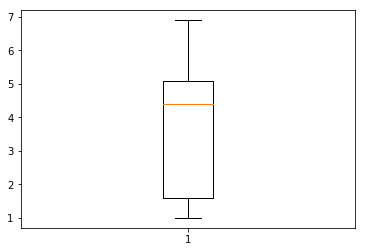

In [11]:
k3 = plt.boxplot(X['petal length'])
plt.savefig('petal_length_dist_updated.png')

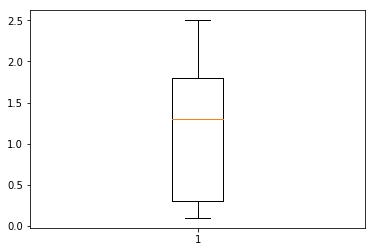

In [12]:
k4 = plt.boxplot(X['petal width'])
plt.savefig('petal_width_dist_updated.png')

In [13]:
X.to_csv('Q1/Q1_1.csv')

2. Implement z-score normalization, and use it to normalize the dataset obtained in step 1. Save the normalized dataset to Q1 2.csv.

In [14]:
features = ['petal length', 'petal width', 'sepal width', 'sepal length']
for i in features:
    mean = X[i].mean()
    std = X[i].std(ddof=0)
    X[i] = (X[i] - mean) / std

In [15]:
X.to_csv('Q1/Q1_2.csv')

In [16]:
X.head()

,sepal length,sepal width,petal length,petal width,target
0,-0.910515,1.159151,-1.373764,-1.348525,2
1,-1.151122,-0.101922,-1.373764,-1.348525,2
2,-1.391729,0.402507,-1.430841,-1.348525,2
3,-1.512032,0.150292,-1.316687,-1.348525,2
4,-1.030819,1.411365,-1.373764,-1.348525,2


3. We want to see if any two input features are highly related. Explain how this can be done by using a numerical measure we discussed in class, and show the corresponding plots.

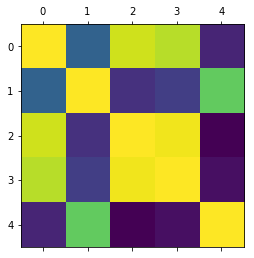

<Figure size 432x288 with 0 Axes>

In [17]:
plt.matshow(X.corr(method = 'pearson'))
plt.show()
plt.savefig('Q1/Q1_3_correlation_heatmap.png')

In [18]:
corr = X[['sepal length', 'sepal width', 'petal length', 'petal width']].corr()
corr.style.background_gradient(cmap='coolwarm')


,sepal length,sepal width,petal length,petal width
sepal length,1,-0.123144,0.879362,0.822587
sepal width,-0.123144,1,-0.406141,-0.340602
petal length,0.879362,-0.406141,1,0.961866
petal width,0.822587,-0.340602,0.961866,1


4. Using sklearn, train a decision tree (with the gini ratio as splitting criterion) using all the dataset obtained in step 2. To avoid overfitting, limit the maximum tree depth to 2.
    1. You can use the class sklearn.tree.DecisionTreeClassifier (https://scikit-learn.org/stable/ modules/generated/sklearn.tree.DecisionTreeClassifier.html).
    2. Show the resultant tree, using the function sklearn.tree.export graphviz (https://scikit-learn. org/stable/modules/generated/sklearn.tree.export_graphviz.html).

In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 2)

In [20]:
x = X[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = X['target']

In [21]:
clf = clf.fit(x,y)

In [22]:
clf.tree_.max_depth
#Crosscheck if the depth is fixed at 2

2

In [23]:
tree.export_graphviz(clf,out_file='tree.dot')

5. Instead of fixing the maximum tree depth to 2, we now use cross-validation to find this value.
    1. Let the candidate maximum depth values be {1,2,3,4}. Report the 10-fold cross-validated ac- curacies for each candidate maximum depth value, and then find the best maximum depth. You can use the function sklearn.model selection.cross val score(https://scikit-learn.org/ stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [24]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [26]:
depth = []
for i in range(1,4):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(clf, x, y, cv=10)
    depth.append((i,scores.mean()))

In [27]:
display(max(depth))

(3, 0.95952380952380945)